In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def scale(im, qualtile_clip=False):
    sorted_int_values = np.sort(np.reshape(im, [-1]))
    if qualtile_clip:
        low5, high95 = int(len(sorted_int_values) * 0.025), int(len(sorted_int_values) * 0.9975)
        im_clipped = np.clip(im, a_min=sorted_int_values[low5], a_max=sorted_int_values[high95])
    else:
        im_clipped = im
    im_clipped /= np.max(im_clipped)
    im_clipped = np.clip(im_clipped, -0.2, 2)
    return im_clipped


In [72]:
folder_figures = './PaperFigures/Figure1/'

# Arm dataset

In [2]:
file_gt_bp = '/home/anna/ResultsSignalDA/MIAvalidation_olddataset/Benchmark_MultiGT_BP//Reconstructions/arm_multi_sigmat_multisegment///arm_multi_sigmat_multisegment.h5'
gt_rec_bp = h5py.File(file_gt_bp, 'r')
multi_GT_bp = gt_rec_bp['BackProjection']

file_gt_bp_lin = '/home/anna/ResultsSignalDA/MIAvalidation_olddataset/Benchmark_LinearGT_BP//Reconstructions/arm_linear_sigmat_multisegment//arm_linear_sigmat_multisegment.h5'
gt_rec_bp_lin = h5py.File(file_gt_bp_lin, 'r')
linear_GT_bp = gt_rec_bp_lin['BackProjection']

In [4]:
file_gt_en = '/home/anna/ResultsSignalDA/MIAvalidation_olddataset/Benchmark_MultiGT_EN/Reconstructions/arm_multi_sigmat_multisegment/arm_multi_sigmat_multisegment.h5'
gt_rec_en = h5py.File(file_gt_en, 'r')
multi_GT_en = gt_rec_en['ElasticNet 1e-5']

file_linbm_en = '/home/anna/ResultsSignalDA/MIAvalidation_olddataset/Benchmark_LinearGT_EN/Reconstructions/arm_linear_sigmat_multisegment/arm_linear_sigmat_multisegment.h5'
linbm_rec_en = h5py.File(file_linbm_en, 'r')
linear_GT_en = linbm_rec_en['ElasticNet 1e-5']

In [7]:
gt_old = '/home/anna/dlbirhoui_data/arm.h5'
gt_old_rec = h5py.File(gt_old, 'r')
signal = gt_old_rec['sigmat_multisegment']

In [8]:
n = signal.shape[0]

In [23]:
from dataLoader import sigMatFilter, sigMatNormalizeTensor
import torch

188


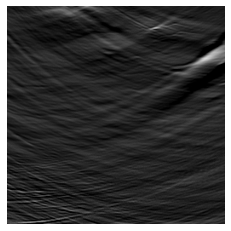

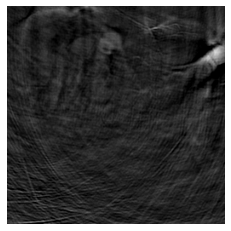

In [68]:
i = np.random.choice(n)
print(i)
show_reconstuction(linear_GT_bp[i], 'linear_bp')
show_reconstuction(multi_GT_bp[i], 'multi_bp')

In [64]:
# i = 661
# i = 11
i = 1106

11

In [56]:
idx_use = list(range(524, 1480))

# i = np.random.choice(n)


# plt.figure(figsize=(10,10))
# plt.imshow(signal[i][idx_use], cmap='gray')

In [107]:
def plot_signal(y_syn, name='', save=False):
    y_syn = y_syn[idx_use]
    s = sigMatFilter(np.expand_dims(y_syn, axis=2))[:, :, 0]
    s = -sigMatNormalizeTensor(torch.Tensor(y_syn))

    plt.figure(figsize=(10,10))
    plt.imshow(s, cmap='gray')
    plt.tight_layout()
    plt.axis('off')
    
    if save:
        fname = f'{folder_figures}/{name}{i}_signal.png'
        plt.savefig(fname, dpi=600)

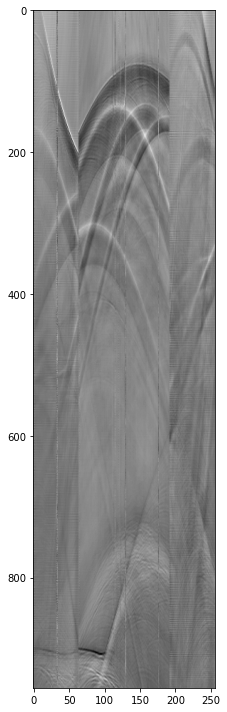

In [78]:
plot_signal()

In [34]:
linbm_rec_en

<HDF5 file "arm_linear_sigmat_multisegment.h5" (mode r)>

In [118]:
def show_reconstuction(img, name, save=False):
    plt.figure(figsize=(4,4))
    rec_img = scale(img, qualtile_clip=False)
    rec_img = np.rot90(rec_img)[:, ::-1]
    plt.imshow(rec_img, cmap='gray', vmin=-0.2, vmax=1.2)
    # plt.colorbar()
    plt.axis('off')
    
    if save:
        fname = f'{folder_figures}/{i}_{name}.png'
        print(fname)
        plt.savefig(fname, dpi=600)
    

# for i in  [661, 11, 1106]:
#     plot_signal(signal[i], 'arm', True)
#     show_reconstuction(linear_GT_en[i], 'linear_en', True)
#     show_reconstuction(multi_GT_en[i], 'multi_en', True)

#     show_reconstuction(linear_GT_bp[i], 'linear_bp', True)
#     show_reconstuction(multi_GT_bp[i], 'multi_bp', True)

# Simulations

In [4]:
sim_old_file = '/home/anna/dlbirhoui_data/parsed_simulated_ellipsesSkinMask_mgt_ms_ring_256_ratio_09_1_20210412.h5'
sim_in = h5py.File(sim_old_file, 'r')
print(sim_in.keys())
signal_sim = sim_in['sigmat_multisegment']

<KeysViewHDF5 ['ground_truth', 'ground_truth_skin_line', 'ground_truth_skin_region', 'ground_truth_vessels', 'recon_linear', 'recon_multisegment', 'recon_ring', 'sigmat_linear', 'sigmat_multisegment', 'sigmat_ring']>


In [5]:
signal_sim.shape

(5500, 2030, 256)

./PaperFigures/Figure1//0_gt_sim.png


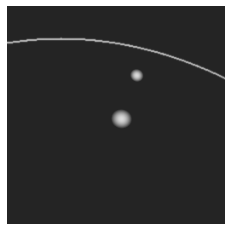

In [119]:
i = 0
show_reconstuction(sim_in['ground_truth'][0], 'gt_sim', True)

./PaperFigures/Figure1//0_multi_sim.png


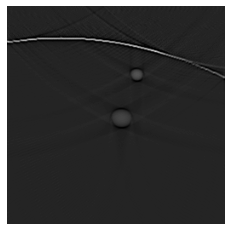

In [120]:
show_reconstuction(sim_in['recon_multisegment'][0], 'multi_sim', True)

./PaperFigures/Figure1//0_linear_sim.png


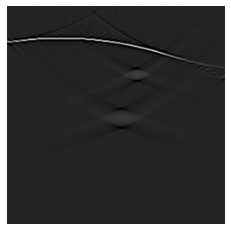

In [121]:
show_reconstuction(sim_in['recon_linear'][0], 'linear_sim', True)

In [ ]:
plt.imshow(sim_in['ground_truth'][0])

In [84]:
sim_file = '/home/anna/data_19Nov2022/old_syn_test.h5'
sim_in = h5py.File(sim_file, 'r')
signal_sim = sim_in['sigmat_multisegment']

In [92]:
sim_in.keys()

<KeysViewHDF5 ['img_num', 'patientID', 'recon_linear', 'recon_multisegment', 'sigmat_multisegment', 'sliceID']>

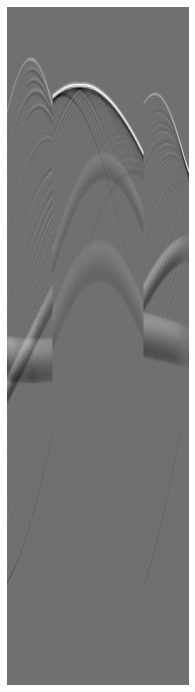

In [105]:
i = 0
plot_signal(-signal_sim[i], 'sim', save=True)

#